# Functional Connectivity - Create Group Average Matrix (HCP, Shine 1, Session 1, CleanGSR, BNA)

In [1]:
from glob import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Set up notebook options and plotting functions.

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
sns.set_context('notebook')

In [4]:
np.set_printoptions(suppress=True)

Load individual FC matrices.

In [5]:
subject_list = np.genfromtxt('/home/despoB/dlurie/Projects/timescale_hierarchy/data/meta/subject_lists/HCP-Shine_1.txt', dtype="U")

In [6]:
corrmat_HCPGSR_fpt = '/home/despoB/dlurie/Projects/timescale_hierarchy/data/hcp/derivatives/sub-{0}_run-01_task-rest_acq-LR_bold_space-MNI_atlas-BNA_variant-HP2000CleanGSR_corrmat.tsv'

In [7]:
corrmat_store = []
for sub in subject_list:
    try:
        mat_file = corrmat_HCPGSR_fpt.format(sub)
        data = np.loadtxt(mat_file)
        np.fill_diagonal(data, 0)
        if np.isnan(data).any(): # Drop matrices with NaN values.
            pass
        else:
            corrmat_store.append(data)
    except:
        print("No data found for subject {0}".format(sub))
        pass
corrmat_store = np.array(corrmat_store)

Create a group average network.

In [8]:
zmat_store = []
for mat in corrmat_store:
    zmat_store.append(np.arctanh(mat)) # Fisher's transformation
zmat_store = np.array(zmat_store)
zmat_mean = np.mean(zmat_store, axis=0)

In [9]:
np.savetxt('/home/despoB/dlurie/Projects/timescale_hierarchy/results/functional_connectivity/HCP_Shine1_Session1_CleanGSR_BNA_zmat_mean.csv', zmat_mean)

Plot the distribution of edge weights and the connectivity matrix.

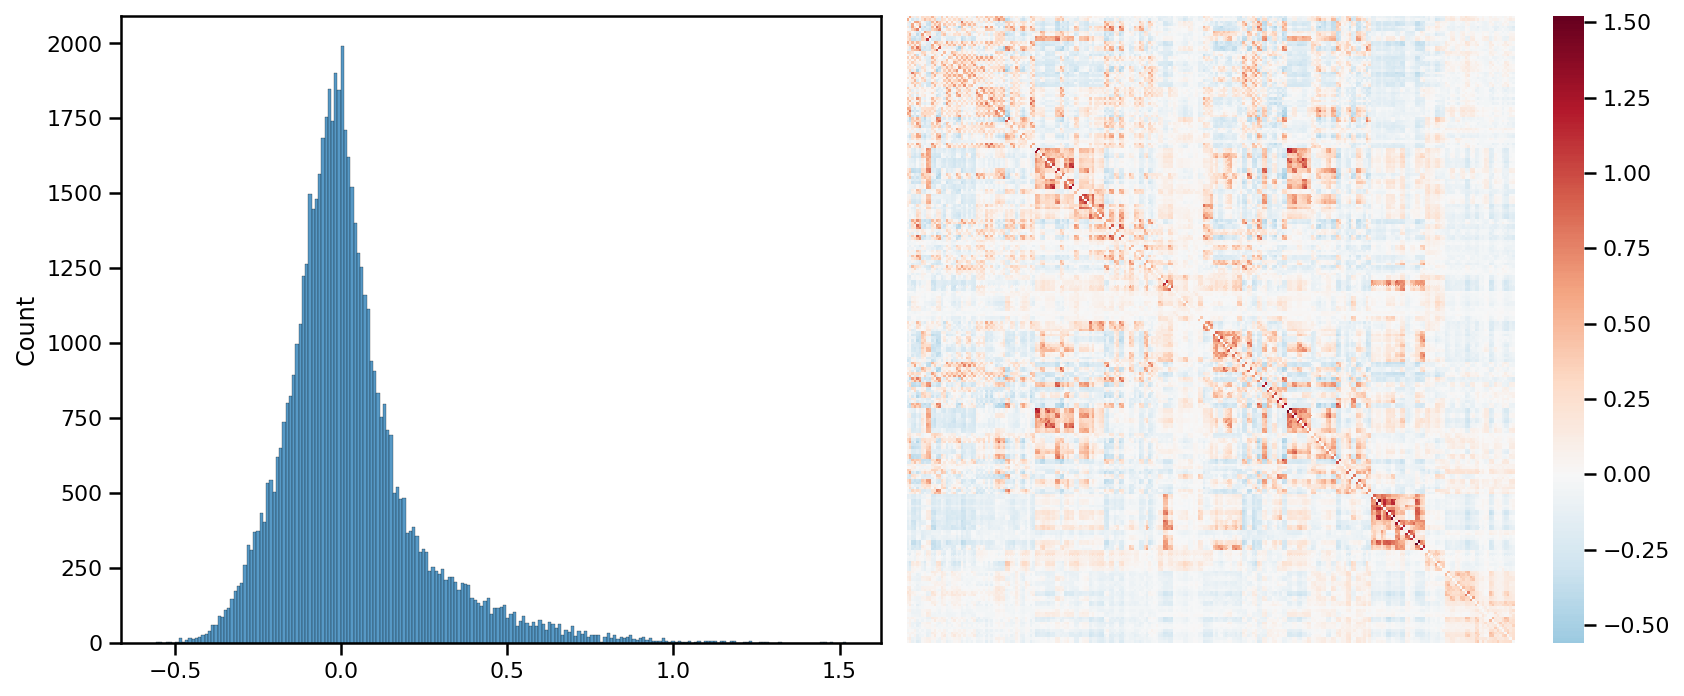

In [10]:
f, axes = plt.subplots(1,2, figsize=(12,5))
sns.heatmap(zmat_mean, yticklabels=False, xticklabels=False, ax=axes[1], cmap='RdBu_r', center=0)
sns.histplot(zmat_mean.flatten(), ax=axes[0])
plt.tight_layout()

Create a matrix which only includes positive edges.

In [11]:
zmat_mean_po = zmat_mean.copy()

In [12]:
zmat_mean_po[zmat_mean_po < 0] = 0

In [13]:
np.savetxt('/home/despoB/dlurie/Projects/timescale_hierarchy/results/functional_connectivity/HCP_Shine1_Session1_CleanGSR_BNA_zmat_mean_po.csv', zmat_mean_po)

Plot the distribution of edge weights and the connectivity matrix.

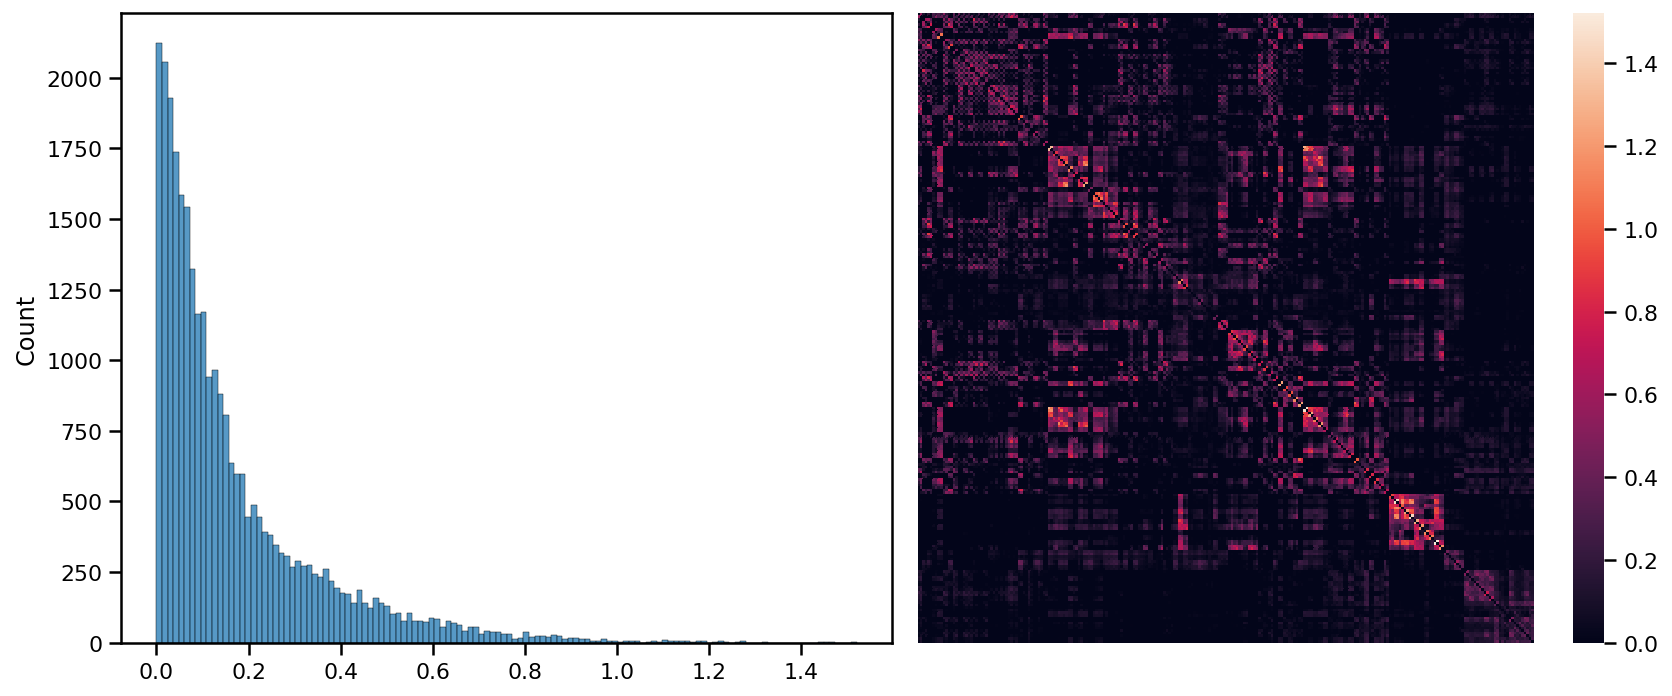

In [14]:
f, axes = plt.subplots(1,2, figsize=(12,5))
sns.heatmap(zmat_mean_po, yticklabels=False, xticklabels=False, ax=axes[1])
sns.histplot(zmat_mean_po.flatten()[zmat_mean_po.flatten() > 0], ax=axes[0])
plt.tight_layout()